In [1]:
import time
import random
import numba

@numba.njit
def qs(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return qs(left) + middle + qs(right)

@numba.njit
def ms(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        ms(left)
        ms(right)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

def random_array(n, int_min, int_max):
    return [random.randint(int_min, int_max) for _ in range(n)]

def sorted_array_non_decreasing(n, int_min, int_max):
    arr = random_array(n, int_min, int_max)
    return sorted(arr)

def sorted_array_non_increasing(n, int_min, int_max):
    arr = random_array(n, int_min, int_max)
    return sorted(arr, reverse=True)

def almost_sorted_array(n, int_min, int_max):
    arr = sorted_array_non_decreasing(n, int_min, int_max)
    percentage_misplaced = 5
    m = int(n / 100.0 * percentage_misplaced / 2)
    for _ in range(m):
        x = random.randint(0, n - 1)
        y = random.randint(0, n - 1)
        arr[x], arr[y] = arr[y], arr[x]
    return arr

def array_with_many_duplicates(n, int_min, int_max):
    percentage_unique = 10
    m = int(n / 100.0 * percentage_unique)
    unique_values = random_array(m, int_min, int_max)
    arr = [unique_values[i % m] for i in range(n)]
    random.shuffle(arr)
    return arr

def array_with_only_one_unique(n, int_min, int_max):
    unique_value = random.randint(int_min, int_max)
    return [unique_value] * n


In [2]:
def generate_times(arr, sort_function):
    start_time = time.time()
    sort_function(arr)
    return time.time() - start_time


int_min = -10**4
int_max = 10**4

test_cases = {
    "randomArray": random_array,
    "sortedArrayNonDecreasing": sorted_array_non_decreasing,
    "sortedArrayNonIncreasing": sorted_array_non_increasing,
    "almostSortedArray": almost_sorted_array,
    "arrayWithManyDuplicates": array_with_many_duplicates,
    "arrayWithOnlyOneUnique": array_with_only_one_unique,
}


In [3]:
qs_times = []
ms_times = []
sizes = [250000, 500000, 1000000, 2500000, 5000000, 10000000, 25000000, 50000000, 100000000]

import time

for s in sizes:
    arr = random_array(s, int_min, int_max)
    
    a = time.time()
    qs(arr)
    qs_times.append(time.time() - a)

    a = time.time()
    ms(arr)
    ms_times.append(time.time() - a)
    


In [10]:
qs_random_times = qs_times
ms_random_time = ms_times

In [11]:
qs_sorted_array_non_decreasing_times = []
ms_sorted_array_non_decreasing_times = []

for s in sizes:
    arr = sorted_array_non_decreasing(s, int_min, int_max)
    
    a = time.time()
    qs(arr)
    qs_sorted_array_non_decreasing_times.append(time.time() - a)

    a = time.time()
    ms(arr)
    ms_sorted_array_non_decreasing_times.append(time.time() - a)

In [12]:
qs_sorted_array_non_increasing_times = []
ms_sorted_array_non_increasing_times = []

for s in sizes:
    arr = sorted_array_non_increasing(s, int_min, int_max)
    
    a = time.time()
    qs(arr)
    qs_sorted_array_non_increasing_times.append(time.time() - a)

    a = time.time()
    ms(arr)
    ms_sorted_array_non_increasing_times.append(time.time() - a)

In [13]:
qs_almost_sorted_array_times = []
ms_almost_sorted_array_times = []

for s in sizes:
    arr = almost_sorted_array(s, int_min, int_max)
    
    a = time.time()
    qs(arr)
    qs_almost_sorted_array_times.append(time.time() - a)

    a = time.time()
    ms(arr)
    ms_almost_sorted_array_times.append(time.time() - a)

In [14]:
qs_array_with_many_duplicates_times = []
ms_array_with_many_duplicates_times = []

for s in sizes:
    arr = array_with_many_duplicates(s, int_min, int_max)
    
    a = time.time()
    qs(arr)
    qs_array_with_many_duplicates_times.append(time.time() - a)

    a = time.time()
    ms(arr)
    ms_array_with_many_duplicates_times.append(time.time() - a)

In [15]:
qs_array_with_only_one_unique_times = []
ms_array_with_only_one_unique_times = []

for s in sizes:
    arr = array_with_only_one_unique(s, int_min, int_max)
    
    a = time.time()
    qs(arr)
    qs_array_with_only_one_unique_times.append(time.time() - a)

    a = time.time()
    ms(arr)
    ms_array_with_only_one_unique_times.append(time.time() - a)

In [18]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.8 MB/s eta 0:00:00


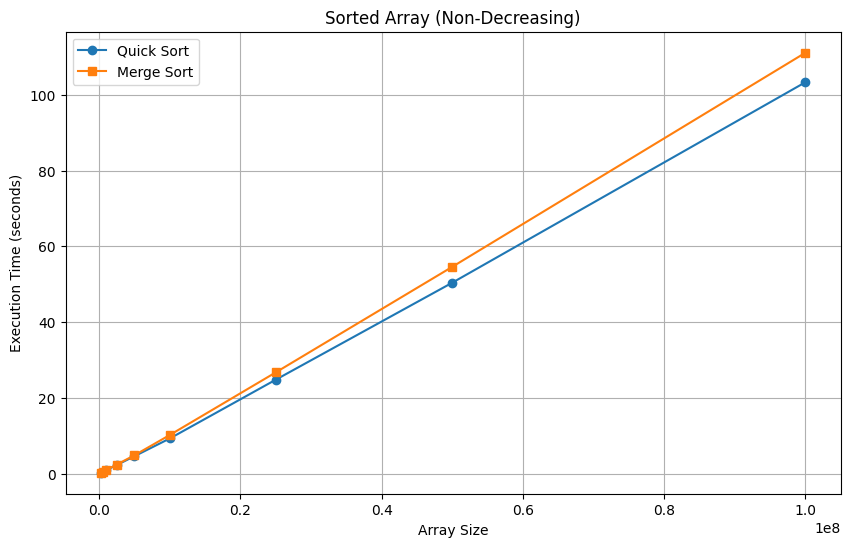

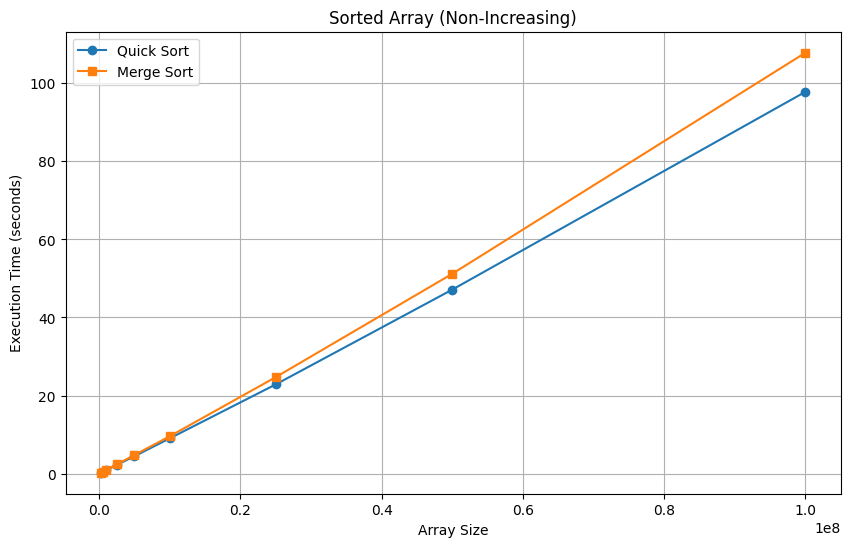

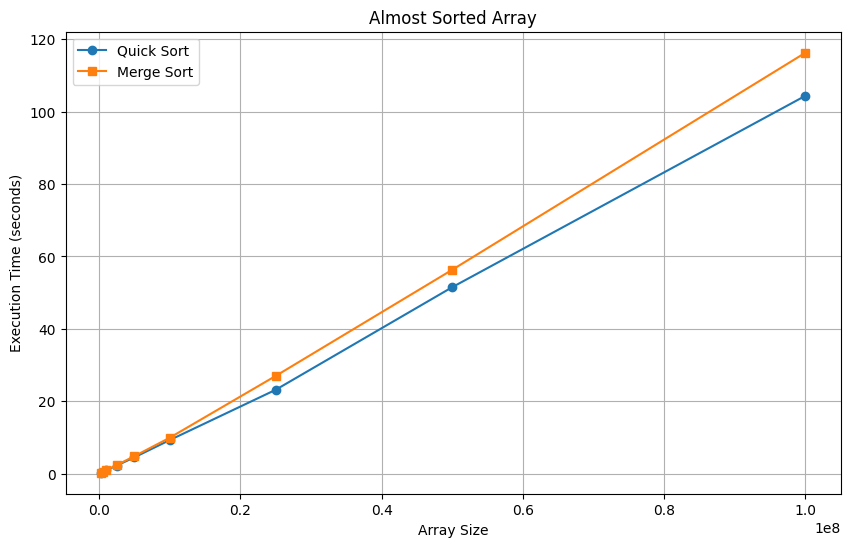

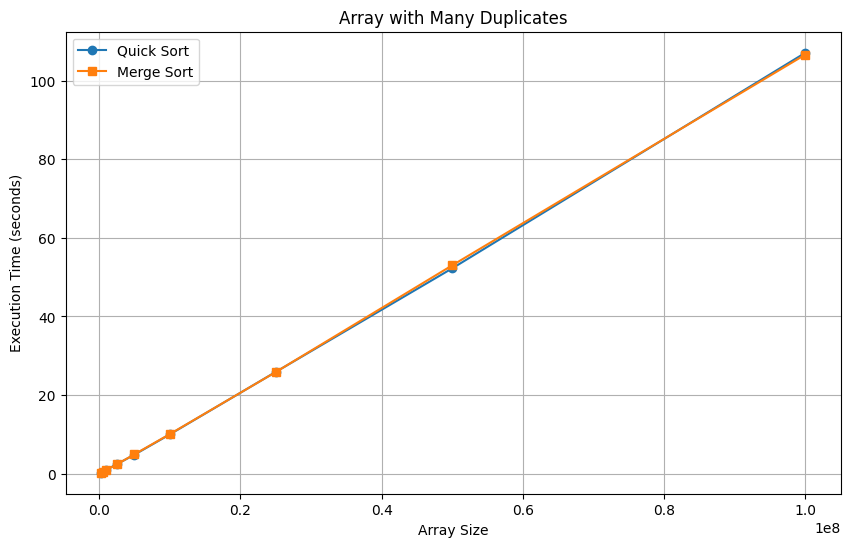

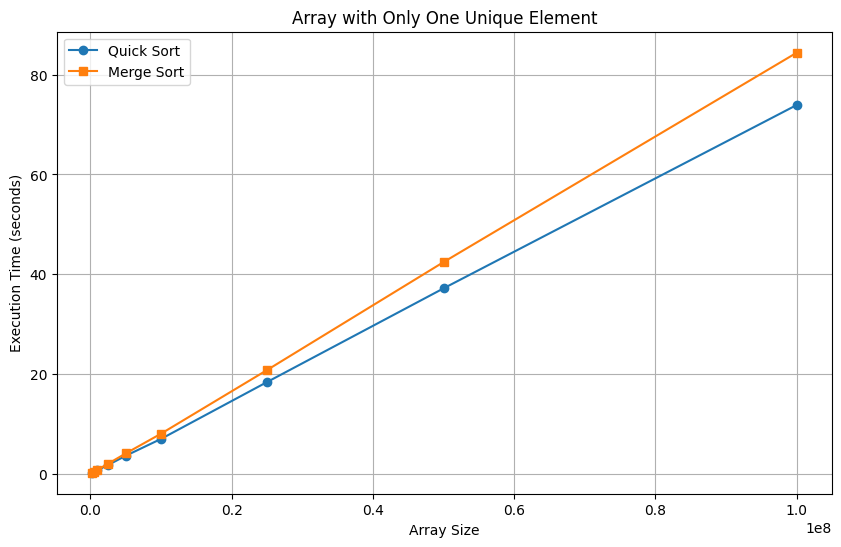

In [19]:
import matplotlib.pyplot as plt

# Plotting function
def plot_sort_times(sizes, quicksort_times, mergesort_times, title):
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, quicksort_times, label='Quick Sort', marker='o')
    plt.plot(sizes, mergesort_times, label='Merge Sort', marker='s')
    plt.xlabel('Array Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each test case
plot_sort_times(sizes, qs_sorted_array_non_decreasing_times, ms_sorted_array_non_decreasing_times, "Sorted Array (Non-Decreasing)")
plot_sort_times(sizes, qs_sorted_array_non_increasing_times, ms_sorted_array_non_increasing_times, "Sorted Array (Non-Increasing)")
plot_sort_times(sizes, qs_almost_sorted_array_times, ms_almost_sorted_array_times, "Almost Sorted Array")
plot_sort_times(sizes, qs_array_with_many_duplicates_times, ms_array_with_many_duplicates_times, "Array with Many Duplicates")
plot_sort_times(sizes, qs_array_with_only_one_unique_times, ms_array_with_only_one_unique_times, "Array with Only One Unique Element")
